In [2]:
from smartdoc15_ch1 import Dataset, evaluate_classification

In [3]:
d = Dataset(data_home="/data/competitions/2015-ICDAR-smartdoc/challenge1/99-computable-version-2017-test",
           download_if_missing=False)

In [5]:
clf_mdlid_target = d.model_classif_targets
print(clf_mdlid_target)
print(clf_mdlid_target.shape)

[ 3 27 21  5 10 20 24 21 26  2  5  3 16 15 17 18  7  8 24 20 24 19  0 25 15
 21 12 21  8  2 10  2  5 12  4 18 21  8 23 19  4 21  1 10 28  9 26  7 13 29]
(50,)


Evaluation ground truth vs ground truth

In [7]:
mean_acc, confusion_matrix = evaluate_classification(
    clf_mdlid_target, clf_mdlid_target, 
    label_names=d.unique_model_names, print_summary=True)

              precision    recall  f1-score   support

datasheet001       1.00      1.00      1.00         1
datasheet002       1.00      1.00      1.00         1
datasheet003       1.00      1.00      1.00         3
datasheet004       1.00      1.00      1.00         2
datasheet005       1.00      1.00      1.00         2
   letter001       1.00      1.00      1.00         3
   letter003       1.00      1.00      1.00         2
   letter004       1.00      1.00      1.00         3
   letter005       1.00      1.00      1.00         1
 magazine001       1.00      1.00      1.00         3
 magazine003       1.00      1.00      1.00         2
 magazine004       1.00      1.00      1.00         1
    paper001       1.00      1.00      1.00         2
    paper002       1.00      1.00      1.00         1
    paper003       1.00      1.00      1.00         1
    paper004       1.00      1.00      1.00         2
    paper005       1.00      1.00      1.00         2
   patent001       1.00    

In [8]:
mean_acc

1.0

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import itertools

In [22]:
# plot_confusion_matrix definition from:
# http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
# BSD license
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
    else:
#         print('Confusion matrix, without normalization')
        pass

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

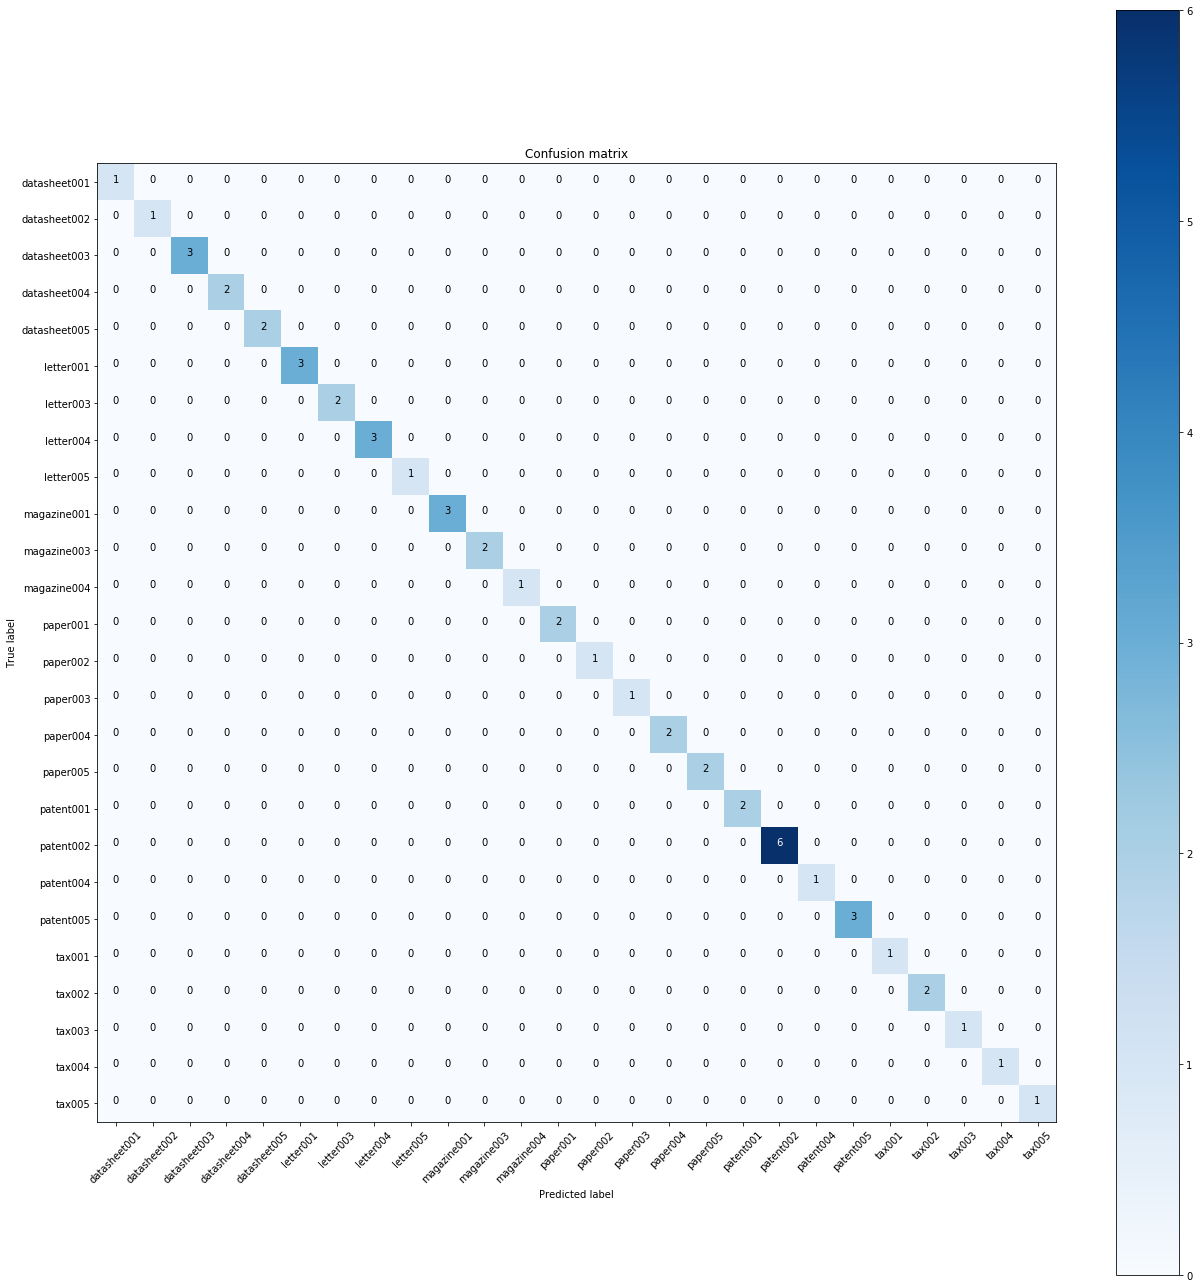

In [23]:
plt.figure(figsize=(18,18))
plot_confusion_matrix(confusion_matrix, classes=d.unique_model_names,
                      title='Confusion matrix')
plt.show()